## Blockchain parser test
Using blk00000.dat

In [1]:
import os
from blockchain_parser.blockchain import Blockchain

In [2]:
''' 
    Taken from https://github.com/alecalve/python-bitcoin-blockchain-parser  -  not the forked one by Jochen
'''

# Instantiate the Blockchain by giving the path to the directory
# containing the .blk files created by bitcoind

c = 0
tc = 0
bc = 0
outputnrs = []
outputvalues = []

try:
    blockchain = Blockchain(os.path.expanduser('./data/blocks'))
    for block in blockchain.get_unordered_blocks():
        for tx in block.transactions:
            for no, output in enumerate(tx.outputs):
                #print("tx=%s outputno=%d type=%s value=%s" % (tx.hash, no, output.type, output.value))
                outputnrs.append(no)
                outputvalues.append(output.value)
                
                c += 1
                #if c >= 10:
                #    raise StopIteration
            tc += 1
        bc += 1
        t = block.header.timestamp
        h = block.hash
        #raise StopIteration
        
except StopIteration: pass
print('last transaction: ', t, h)

print('Blocks: ', bc)
print('TXs: ', tc)
print('outputs: ', c)

last transaction:  2011-04-25 03:22:45 000000000000b55a58b25653b4b418a9e43ecc47d1eaf3b5a90ee8790e7579b5
Blocks:  119964
TXs:  435139
outputs:  653859


## Histogramms

(array([6.36825e+05, 5.46000e+03, 4.27000e+03, 2.90300e+03, 1.77500e+03,
        1.11100e+03, 6.69000e+02, 4.47000e+02, 2.41000e+02, 1.58000e+02]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

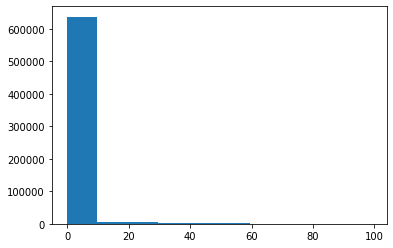

In [3]:
import matplotlib.pyplot as plt
plt.hist(outputnrs)

(array([6.53696e+05, 1.02000e+02, 5.10000e+01, 8.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.0e+00, 4.0e+12, 8.0e+12, 1.2e+13, 1.6e+13, 2.0e+13, 2.4e+13,
        2.8e+13, 3.2e+13, 3.6e+13, 4.0e+13]),
 <BarContainer object of 10 artists>)

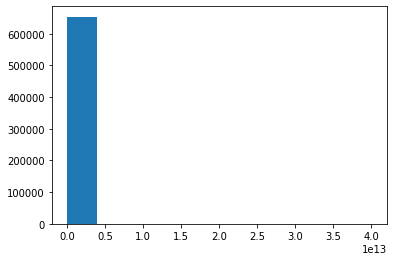

In [4]:
plt.hist(outputvalues)

## Conversion to csv files for Neo4j

In [5]:
''' 
    Taken from https://github.com/SchaeferJ/Blockchain_Parser/blob/master/btc-to-csv.py
'''

for tx in block.transactions:
    tx_id = tx.txid

    outputs = []
    addresses = []
    receives = []
    inSum = 0
    outSum = 0
    inDegree = 0
    for o in range(len(tx.outputs)):
        try:
            # Create a list of outputs, where each output is itself a list comprising value, receiving address and
            # output number.
            addr = tx.outputs[o].addresses[0].address
            val = tx.outputs[o].value
            outSum += val
            outputs.append([val, addr, o])
            receives.append([tx_id, val, o, addr, 'RECEIVES'])
            addresses.append([addr])
        except Exception as e:
            val = tx.outputs[o].value
            outSum += val
            outputs.append([val, 'unknown', o])
            pass

In [6]:
receives

[['3511d57b5d64df0c1ba7c8b9d16ecdad7ea032e31003ac76abb9118e50ccea67',
  2802000000,
  0,
  '1FabnFuatDMP15qmG8B66sw4uDjjUumW2b',
  'RECEIVES'],
 ['3511d57b5d64df0c1ba7c8b9d16ecdad7ea032e31003ac76abb9118e50ccea67',
  5000000,
  1,
  '12DsinE3HnKj3cqaZZ523QfTmaoNy6jo4S',
  'RECEIVES']]

## Blcockchain parser properties

In [7]:
tx.outputs[1].addresses[0].address

'12DsinE3HnKj3cqaZZ523QfTmaoNy6jo4S'

In [8]:
len(tx.outputs)
tx.txid
tx.inputs[0]

Input(946b547d6103956ef9d93f3142c0a190d7ca58f505bcd21e9bda833ebecebb30,0)

In [9]:
print(block.header.timestamp)

2011-04-25 03:22:45


In [10]:
tx.inputs[0].transaction_index

0

In [11]:
tx.is_coinbase()

False

In [12]:
tx.txid

'3511d57b5d64df0c1ba7c8b9d16ecdad7ea032e31003ac76abb9118e50ccea67'